In [1]:
'''Trains a Bidirectional LSTM on the IMDB sentiment classification task.
Output after 4 epochs on CPU: ~0.8146
Time per epoch on CPU (Core i7): ~150s.
'''

from __future__ import print_function
import numpy as np
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
max_features = 20000  # 一共保留多少个不同的词作为特征
maxlen = 100  # 每条数据保留的最多的词数
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)


In [7]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))  # 嵌入层
model.add(Bidirectional(LSTM(64)))  # 64 代表的是隐层单元数（输出的维度数），但是因为是双向循环神经网络，所以输出维度为 128
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# model = Sequential()
# model.add(Embedding(max_features, 128, input_length=maxlen))  # 嵌入层
# model.add(LSTM(64))  # 64 代表的是隐层单元数（输出的维度数）
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,658,945
Trainable params: 2,658,945
Non-trainable params: 0
_________________________________________________________________


In [7]:
class LossHistory(keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        self.losses = {'batch': [], 'epoch': []}
        self.accuracy = {'batch': [], 'epoch': []}
        self.val_loss = {'batch': [], 'epoch': []}
        self.val_acc = {'batch': [], 'epoch': []}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def plot_loss(self, loss_type='epoch'):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc='upper right')
        plt.show()

history = LossHistory()

In [8]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=[x_test, y_test],
          callbacks=[history])

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 342s 14ms/step - loss: 0.4112 - acc: 0.8118 - val_loss: 0.3615 - val_acc: 0.8428
Epoch 2/15
25000/25000 [==============================] - 361s 14ms/step - loss: 0.2258 - acc: 0.9106 - val_loss: 0.4173 - val_acc: 0.8429
Epoch 3/15
25000/25000 [==============================] - 357s 14ms/step - loss: 0.1284 - acc: 0.9520 - val_loss: 0.4672 - val_acc: 0.8366
Epoch 4/15
25000/25000 [==============================] - 356s 14ms/step - loss: 0.0764 - acc: 0.9748 - val_loss: 0.5681 - val_acc: 0.8335
Epoch 5/15
25000/25000 [==============================] - 326s 13ms/step - loss: 0.0395 - acc: 0.9866 - val_loss: 0.7704 - val_acc: 0.8365
Epoch 6/15
25000/25000 [==============================] - 317s 13ms/step - loss: 0.0311 - acc: 0.9901 - val_loss: 0.7784 - val_acc: 0.8230
Epoch 7/15
25000/25000 [==============================] - 330s 13ms/step - loss: 0.0243 - acc: 0.9925 - val

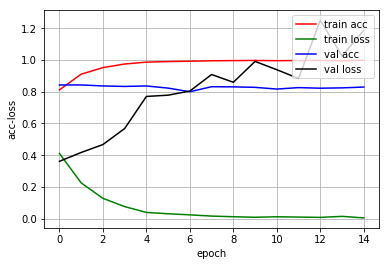

In [9]:
history.plot_loss('epoch')